# COVID Data

In [1]:
# Import numpy, to manage numerical data
import numpy as np

# Import matplotlib, for plotting
import matplotlib.pyplot as plt

# Import utilities for managing dates
from matplotlib.dates import date2num, num2date, datetime

In [2]:
# Set some default setttings for plotting
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2.
rcParams['font.family'] = 'sans serif'
rcParams['font.size'] = 18

## Load the Data

In [3]:
# Loads cases file
cases = np.loadtxt('data/diario_estado.csv', delimiter=',') 

In [4]:
# Check some information about the loaded data
print(type(cases))
print(cases.shape)

<class 'numpy.ndarray'>
(34, 203)


In [5]:
# Check METADATA to see number and state
meta = open('data/metadata_diario_estado.txt','r').read()

In [6]:
# Check out what the meta data is
print(type(meta))

<class 'str'>


In [7]:
meta

'      \nAGUASCALIENTES 1     \nBAJA CALIFORNIA 2     \nBAJA CALIFORNIA SUR 3     \nCAMPECHE 4     \nCHIAPAS 7     \nCHIHUAHUA 8     \nDISTRITO FEDERAL 9     \nCOAHUILA 5     \nCOLIMA 6     \nDURANGO 10     \nGUANAJUATO 11     \nGUERRERO 12     \nHIDALGO 13     \nJALISCO 14     \nMEXICO 15     \nMICHOACAN 16     \nMORELOS 17     \nNAYARIT 18     \nNUEVO LEON 19     \nOAXACA 20     \nPUEBLA 21     \nQUERETARO 22     \nQUINTANA ROO 23     \nSAN LUIS POTOSI 24     \nSINALOA 25     \nSONORA 26     \nTABASCO 27     \nTAMAULIPAS 28     \nTLAXCALA 29     \nVERACRUZ 30     \nYUCATAN 31     \nZACATECAS 32     \nNacional 0     \n'

## Data Pre-Processing

In [8]:
# Extract the first row, which indicates the time row
time = cases[0, :]

In [9]:
# Check for any nan values
sum(np.isnan(time))

1

There is 1 nan value in the times data. We can use a masked array to get rid of it. 

In [10]:
# Apply a mask to the time data
time = np.ma.masked_invalid(time)

In [11]:
# Converts dates to numerical encodings, which we can use for plotting
times = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            times[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]),
                                                   np.int(str(time[ii])[2:4]),
                                                   np.int(str(time[ii])[0:2])))
        else:
            times[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]),
                                                   np.int(str(time[ii])[1:3]),
                                                   np.int(str(time[ii])[0:1])))

In [12]:
# Mask the times data
times = np.ma.masked_equal(times, 0)

In [13]:
# Get rid of any invalid values in the case data
cases = np.ma.masked_invalid(cases) 

## Pre-process Metadata

In [14]:
# Check what meta looks like
meta

'      \nAGUASCALIENTES 1     \nBAJA CALIFORNIA 2     \nBAJA CALIFORNIA SUR 3     \nCAMPECHE 4     \nCHIAPAS 7     \nCHIHUAHUA 8     \nDISTRITO FEDERAL 9     \nCOAHUILA 5     \nCOLIMA 6     \nDURANGO 10     \nGUANAJUATO 11     \nGUERRERO 12     \nHIDALGO 13     \nJALISCO 14     \nMEXICO 15     \nMICHOACAN 16     \nMORELOS 17     \nNAYARIT 18     \nNUEVO LEON 19     \nOAXACA 20     \nPUEBLA 21     \nQUERETARO 22     \nQUINTANA ROO 23     \nSAN LUIS POTOSI 24     \nSINALOA 25     \nSONORA 26     \nTABASCO 27     \nTAMAULIPAS 28     \nTLAXCALA 29     \nVERACRUZ 30     \nYUCATAN 31     \nZACATECAS 32     \nNacional 0     \n'

In [15]:
# Re-organize the meta-data into a list
states = []
for state in meta.split('\n'):
    state = state.strip()
    if state is not '':
        states.append(state)

In [16]:
# Check the meta-data
states

['AGUASCALIENTES 1',
 'BAJA CALIFORNIA 2',
 'BAJA CALIFORNIA SUR 3',
 'CAMPECHE 4',
 'CHIAPAS 7',
 'CHIHUAHUA 8',
 'DISTRITO FEDERAL 9',
 'COAHUILA 5',
 'COLIMA 6',
 'DURANGO 10',
 'GUANAJUATO 11',
 'GUERRERO 12',
 'HIDALGO 13',
 'JALISCO 14',
 'MEXICO 15',
 'MICHOACAN 16',
 'MORELOS 17',
 'NAYARIT 18',
 'NUEVO LEON 19',
 'OAXACA 20',
 'PUEBLA 21',
 'QUERETARO 22',
 'QUINTANA ROO 23',
 'SAN LUIS POTOSI 24',
 'SINALOA 25',
 'SONORA 26',
 'TABASCO 27',
 'TAMAULIPAS 28',
 'TLAXCALA 29',
 'VERACRUZ 30',
 'YUCATAN 31',
 'ZACATECAS 32',
 'Nacional 0']

## Select a state

In [17]:
# Set a state to analyze
state_name = 'JALISCO'

In [18]:
# Get state index and title information
for state in states:
    if state_name in state:
        splits = state.split(' ')
        index = int(splits[-1])
        title = ' '.join(splits[:-1])

In [19]:
# Select state cases
state_cases = cases[index, :]

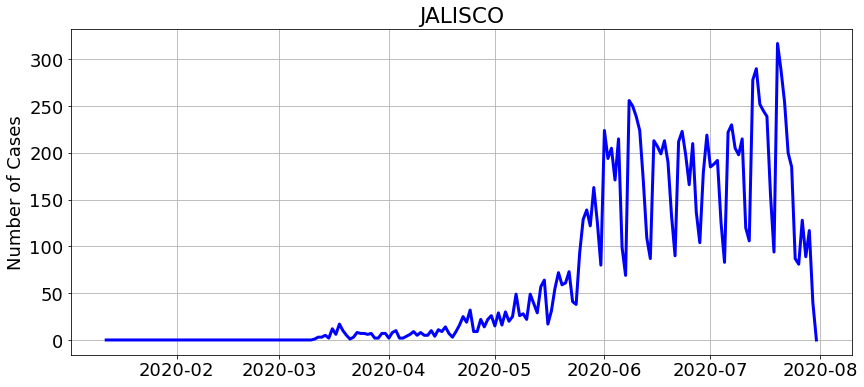

In [20]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(num2date(times[1:]), state_cases[1:], lw=3, color='blue')
plt.grid()
plt.title(title)
plt.ylabel('Number of Cases');

## Comparing Multiple States

An example of plotting and comparing two states together.

In [21]:
# Select state cases
s1 = cases[2, :]
s2 = cases[10, :]

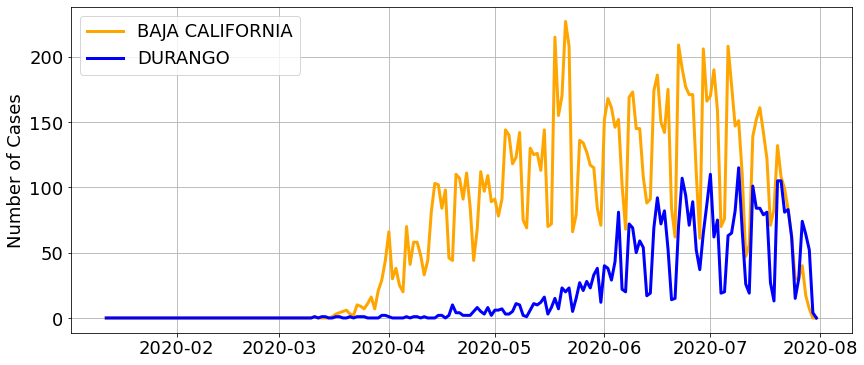

In [22]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(num2date(times[1:]), s1[1:], lw=3, color='orange', label='BAJA CALIFORNIA')
plt.plot(num2date(times[1:]), s2[1:], lw=3, color='blue', label='DURANGO')
plt.legend()
plt.grid()
plt.ylabel('Number of Cases');

## National Cases

In [23]:
# Get the national cases
national_cases = cases[-1, :]

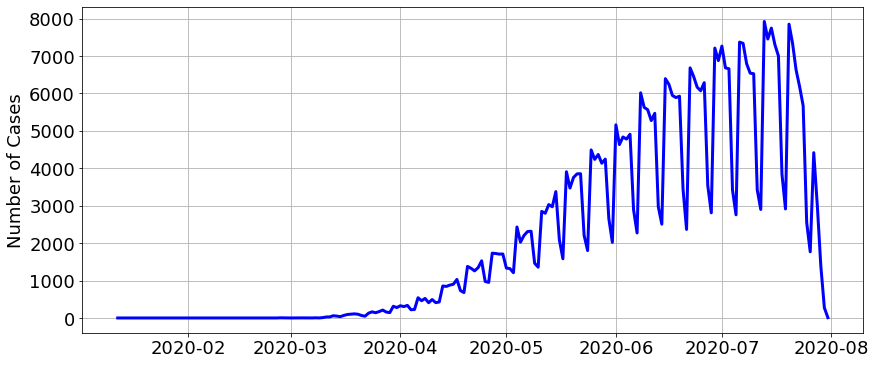

In [24]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(num2date(times[1:]), national_cases[1:], lw=3, color='blue')
plt.grid()
plt.ylabel('Number of Cases');

## Proportion of cases

In this example, we will examine 

We will use Baja California as an example. 

In [25]:
# Get cases for the state, and for the country
baja =cases[2, :] 
nat = cases[-1, :]

In [26]:
# Calculate the proportion of cases in the state
baja_pct = baja / nat

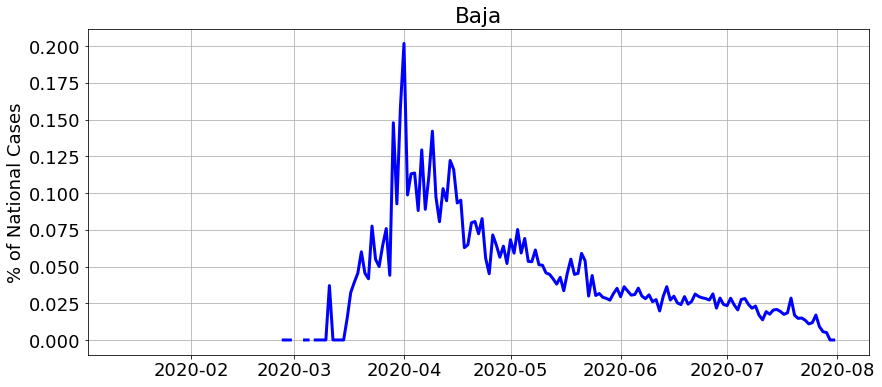

In [27]:
# Plot the propo
fig, ax = plt.subplots(figsize=(14, 6))
plt.plot(num2date(times[1:]), baja_pct[1:], lw=3, color='blue')
plt.grid()
plt.title('Baja')
plt.ylabel('% of National Cases');

We can also compare this to what percentage of the Mexican population live in Baja. 

Note: population numbers here are taken from Wikipedia.

In [28]:
# Compare population of Baja to Mexican population
baja_pop = 3.3
mexico_pop = 127
baja_pct_pop = baja_pop / mexico_pop

In [29]:
# Check 
print("Baja California has %{:1.2f} of the Mexican population.".format(baja_pct_pop * 100))

Baja California has %2.60 of the Mexican population.


## Mini Chatbot Example

In [30]:
# Use a dictionary to store mapping between labels and indices
#   This is a mini-version, and would need to be extended
labels = {'OAXACA' : 20, 'BAJA CALIFORNIA' : 2}

In [31]:
# Ask the user for a state 
state_label = input('Which state? ')

Which state? OAXACA


In [32]:
# Get the index of the requested state
index = labels[state_label]

In [33]:
# Get the data of the requested state
state_cases = cases[index, :]

Text(0.5, 1.0, 'OAXACA')

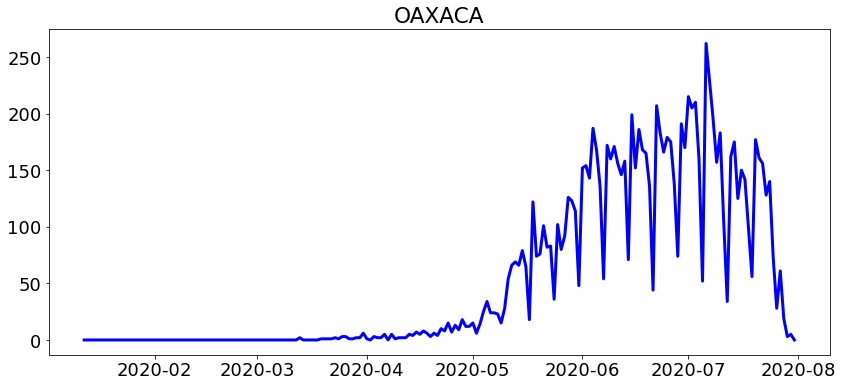

In [34]:
# Plot the data of the requested state
fig, ax = plt.subplots(figsize=(14, 6))
state_cases = cases[index, :]
plt.plot(num2date(times[1:]), state_cases[1:], lw=3, color='blue')
plt.title(state_label)